# Introduction

## Best Neighborhood in case of a Zombie Apocalypse
We chose to find the best neighboorhood in case of a zombie apocalypse.

For this Final Project, we were posed with the question, “What is the best neighborhood in Pittsburgh?” However, “best” could meet any criteria our group chose. Using data from the WPRDC, our group came up with various ideas of what best could mean, including the most diverse neighborhood and the most pet-friendly neighborhood. Ultimately, the datasets of Bridges and Parks in the City of Pittsburgh led us to our metric of finding the best neighborhood in the case of a Zombie Apocalypse.

## The Metric
The metric is to find the best neighborhood in case of a zombie apocalypse. We decided to base our stuff on the least amount of people in a neighborhood but on the most parks and bridges.

Therfore, our datasets are:
 

**Parks**: Having more parks means that you have more space to hide/avoid zombies.

**Bridges**: The more bridges connected to a neighborhood, the easier it is to remain remote from other neighborhoods and decrease the amount of routes and entrances for zombies to enter from. 

**Population**: My goal is to find the best neighborhood with the lowest population in Pittsburgh. 

In [1]:
# Imports
import pandas as pd
import numpy as np
import math
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt


# Parks Dataset 
**By Maia Harmon**

My goal is to find out how many parks are in each neighborhood because having more parks would mean there is space to hide or avoid the zombies. 


In [2]:
#Reading in csv file
parks = pd.read_csv("Dataset for Parks.csv")
parks.head(5)


,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


Above, is the table for the parks dataset. 

Now, I will find out how many parks are in a each neighborhood by using a dictionary. 

In [3]:
dictionary = dict()

for column in parks:
    looping = parks['neighborhood'].values

for value in looping: 
    if value not in dictionary:
            dictionary[value] = 1
    else:
        dictionary[value] = dictionary[value] + 1 

print(dictionary)

{'Beechview': 8, 'Crawford-Roberts': 3, 'North Shore': 3, 'Allegheny Center': 2, 'Central Business District': 10, 'Central Northside': 3, 'East Liberty': 12, 'Bedford Dwellings': 1, 'South Side Slopes': 7, 'South Side Flats': 6, 'Lower Lawrenceville': 3, 'Banksville': 2, 'South Oakland': 5, 'Homewood North': 2, 'Hazelwood': 6, 'Bon Air': 1, 'Central Oakland': 4, 'Brighton Heights': 4, 'Brookline': 3, 'Spring Garden': 2, 'Lincoln-Lemington-Belmar': 3, 'Windgap': 1, 'Troy Hill': 5, 'Westwood': 3, 'Perry South': 2, 'Homewood West': 1, 'Squirrel Hill South': 6, 'Strip District': 2, 'Arlington': 1, 'Stanton Heights': 1, 'Crafton Heights': 2, 'Upper Lawrenceville': 3, 'East Carnegie': 1, 'East Hills': 1, 'Point Breeze': 7, 'Allentown': 2, 'Duquesne Heights': 2, 'Mount Washington': 6, 'Esplen': 1, 'Fairywood': 1, 'Fineview': 2, 'Garfield': 3, 'Greenfield': 3, 'Larimer': 3, 'Bloomfield': 3, 'Perry North': 2, 'North Oakland': 1, 'Hays': 1, 'Elliott': 4, 'Highland Park': 2, 'Homewood South': 1, 

This is showing how many times a neighborhood was mentioned in showing how parks were in each neighborhood. The for loop is going through the parks dataset and taking all the values of each time that specific neighborhood was mentioned. The result is the neighborhood with the total amount of times. 

In [4]:
#Make into series
park_series = pd.Series(dictionary)

#Put in descending order 
park_sorted = park_series.sort_values(ascending=False)
print(park_sorted)

East Liberty                 12
Central Business District    10
Beechview                     8
South Side Slopes             7
Point Breeze                  7
                             ..
Hays                          1
Arlington                     1
Stanton Heights               1
Morningside                   1
Squirrel Hill North           1
Length: 73, dtype: int64


This is the sorted series of all the neighborhoods. As shown, you can see that **East Liberty** is the neighborhood that has the most parks in it. Below, we are going to plot this data. 

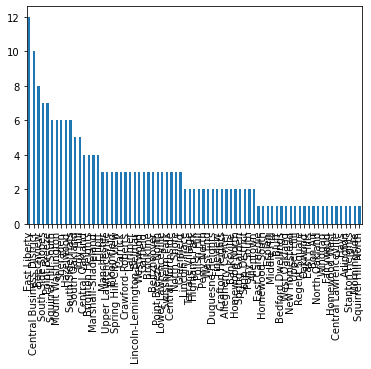

In [5]:
park_sorted.plot.bar()

In [7]:
#Getting only the top 6 
top6 = park_sorted.head(6)
print(top6)

East Liberty                 12
Central Business District    10
Beechview                     8
South Side Slopes             7
Point Breeze                  7
Squirrel Hill South           6
dtype: int64


Text(0, 0.5, 'Number of Parks')

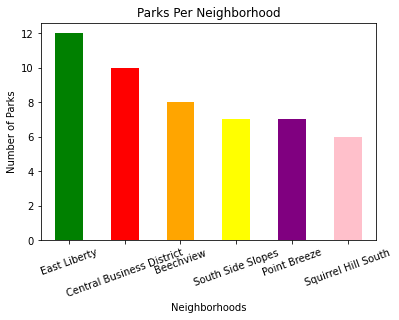

In [8]:
#Plotting the top 6 
plt.style.use('seaborn-bright')
top6.plot.bar(rot = 20, color=['green', 'red', 'orange', 'yellow', 'purple', 'pink'])
plt.title("Parks Per Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Parks")

Above is the bar graph for the top 6 neighborhoods that have the most parks. 

# Conclusion
Finally, we can see that **East Liberty** is the neighborhood that has the most parks in it. 

# Bridges Dataset 
**By Kaitlyn Shin**

For the Final Project I decided to choose a dataset which focused on bridges.  In the case of a zombie apocalypse, having the most amount of brides conntected to a neighborhood would be beneficial for the residents since the destruction of those bridges would ultimately limit the amount of routes and entrances zombies would be able to enter from.

Using this dataset, I will be able to calculate the neighborhoods with the most and least amount of bridge connections in order to conclude which neighborhood would be best in a zombie apocalypse.

In [10]:
#Reading in csv file
bridges = pd.read_csv("Bridges_Dataset.csv")
#Make table 
bridges.head(5)

,id,name,start_neighborhood,end_neighborhood,year_built,year_rehab,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2002832442,Fort Duquesne Blvd,Central Business District,NaN,NaN,NaN,NaN,Central Business District,6,2.0,42003020100,6.0,2.0,2.0,1-3,40.446450,-79.996537
1,761156487,28th Street Bridge,Strip District,Polish Hill,1931.0,1974.0,https://tools.wprdc.org/images/pittsburgh/brid...,Strip District,7,6.0,42003060500,6.0,6.0,2.0,2-25,40.456182,-79.973714
2,290122944,Second Avenue Bridge,Squirrel Hill South,Swisshelm Park,1886.0,1970.0,NaN,Swisshelm Park,5,14.0,42003141400,3.0,14.0,4.0,2-12,40.415210,-79.915699
3,1811170969,Alexander Street Bridge,West End,NaN,1924.0,2000.0,https://tools.wprdc.org/images/pittsburgh/brid...,West End,2,20.0,42003562600,5.0,20.0,6.0,1-17,40.440063,-80.033353
4,2047190591,Millvale Trail Pedestrian Bridge,Troy Hill,NaN,NaN,NaN,NaN,Troy Hill,1,24.0,42003240600,1.0,24.0,1.0,1-1,40.466586,-79.977731


In the table above, I have a partial representation of the bridges dataset.

In [11]:
bridge_dict = dict()
# Creating dictionary of the neighborhoods and their number of bridges
for column in bridges:
    looping = bridges['neighborhood'].values

for value in looping: 
    if value not in bridge_dict:
            bridge_dict[value] = 1
    else:
        bridge_dict[value] = bridge_dict[value] + 1 

print(bridge_dict)

{'Central Business District': 12, 'Strip District': 1, 'Swisshelm Park': 2, 'West End': 4, 'Troy Hill': 7, 'Squirrel Hill South': 14, 'Brookline': 1, 'Overbrook': 6, 'Arlington': 2, 'Oakwood': 5, 'Bloomfield': 2, 'Greenfield': 2, 'Polish Hill': 3, 'Lower Lawrenceville': 2, 'Brighton Heights': 2, 'Hays': 6, 'Beechview': 1, 'Banksville': 1, 'Shadyside': 6, 'Central Oakland': 1, 'Sheraden': 3, 'East Allegheny': 4, 'Manchester': 1, 'Mount Washington': 4, 'Larimer': 3, 'East Liberty': 2, 'Summer Hill': 1, 'Bon Air': 3, 'Bluff': 2, 'South Oakland': 4, 'Hazelwood': 4, 'Point Breeze': 1, 'Squirrel Hill North': 2, nan: 4, 'Allentown': 1, 'South Side Flats': 5, 'Spring Hill-City View': 1, 'Allegheny Center': 3, 'Lincoln-Lemington-Belmar': 2, 'Perry South': 2, 'Northview Heights': 1, 'South Side Slopes': 5, 'Allegheny West': 2, 'Homewood South': 1, 'Highland Park': 2, 'California-Kirkbride': 1, 'Marshall-Shadeland': 2, 'South Shore': 1, 'Esplen': 1, 'Elliott': 1, 'Regent Square': 1, 'Windgap': 2,

In the above dictionary, I have each neighborhood listed along with how many bridges is connected to it.

In [13]:
#Make into series in ascending order
brid = pd.Series(bridge_dict).sort_values(ascending=False)
print(brid)

Squirrel Hill South          14
Central Business District    12
Troy Hill                     7
Overbrook                     6
Hays                          6
Shadyside                     6
Oakwood                       5
South Side Flats              5
South Side Slopes             5
NaN                           4
West End                      4
Hazelwood                     4
South Oakland                 4
Mount Washington              4
East Allegheny                4
Bon Air                       3
Larimer                       3
Allegheny Center              3
Sheraden                      3
Polish Hill                   3
Bloomfield                    2
Greenfield                    2
Perry South                   2
Lincoln-Lemington-Belmar      2
Swisshelm Park                2
Windgap                       2
Highland Park                 2
Arlington                     2
Squirrel Hill North           2
Allegheny West                2
Bluff                         2
Marshall

After creating the dictionary for Bridges, I then created a series and sorted it in ascending order in order to determine which neighborhoods do not need to be included in the graph.  

In [14]:
#Truncate series for better graph
top = brid.head(9)
print(top)

Squirrel Hill South          14
Central Business District    12
Troy Hill                     7
Overbrook                     6
Hays                          6
Shadyside                     6
Oakwood                       5
South Side Flats              5
South Side Slopes             5
dtype: int64


Using the series created previously, I truncated the data to only include the top 9 neighborhoods with the most amount of bridges connected to them.

Text(0, 0.5, 'Number of Bridges')

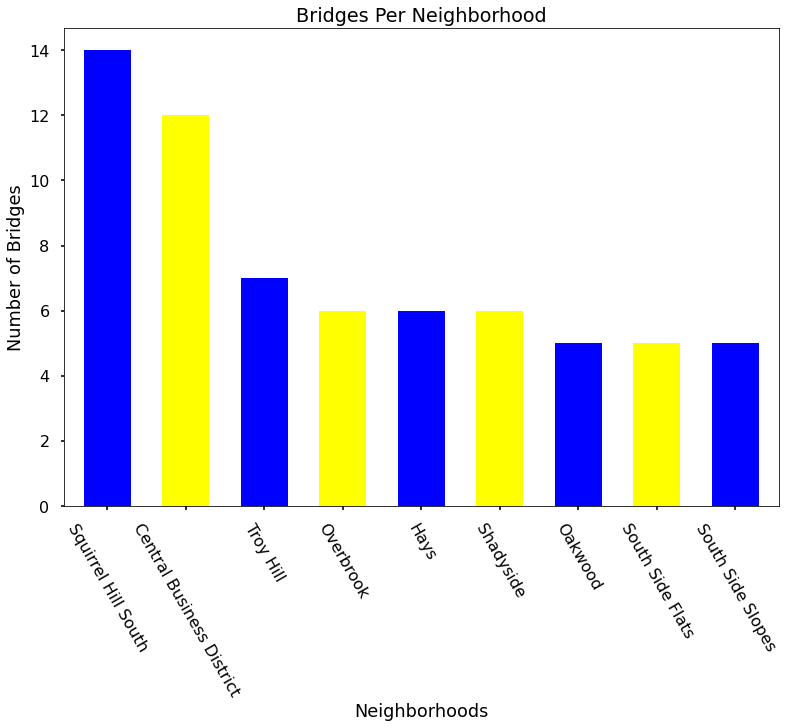

In [24]:
top.plot.bar(rot=-60, width=0.6, color=['blue', 'yellow', 'blue', 'yellow', 'blue', 'yellow', 'blue', 'yellow', 'blue'])
plt.style.use('seaborn-poster')
plt.title('Bridges Per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Bridges')

From the data, I was able to plot a bar graph and changed certain parameters, the style of the graph, and the titles the x-axis and y-axis.  Going further, I was able to make the graph more visually pleasing by rotating the x-axis titles and increasing the width of the bars.

Text(0, 0.5, 'Number of Bridges')

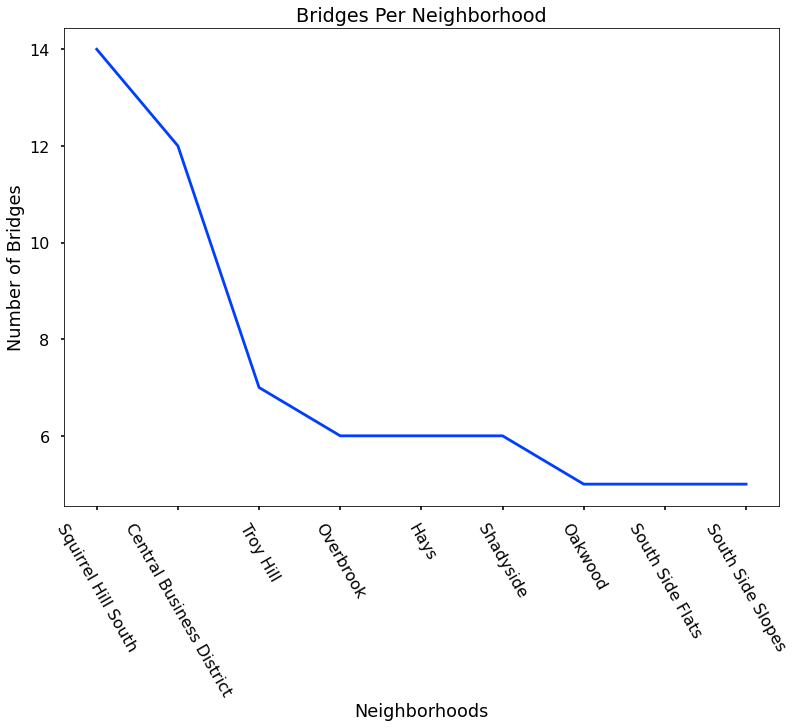

In [19]:
top.plot(rot=-60)
plt.style.use('seaborn-poster')
plt.title('Bridges Per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Bridges')

To provide a second visual representation of the data, I chose to graph a plot graph more drastically in order to show the differernce in how many bridges there are in Squirrel Hill South and Central Business District compared to the other neighborhoods.

# Conclusion 
In conclusion, the best neighborhood based on my bridges dataset alone would be Squirrel Hill South because there is a total of 14 bridges that are connected to the neighborhood.  In this case, Squirrel Hill South would be the best neighborhood in a Zombie Apocalypse because it would be the easiest to cut off the bridge access points to get into the neighborhood. 

# Population Dataset 
**By Jay Patel**

I chose the Population census of Pittsburgh for different areas as a data set because during a zombie apocalypse having vacant places and unpopulated areas is an advantage hiding and avoiding the zombies. My goal is to find the best neighborhood with the lowest population in Pittsburgh. 

In [20]:
population = pd.read_csv("Neighborhood_Population.csv")
population.head()
population.loc[:,["Neighborhood","2020_Total_Population"]]

,Neighborhood,2020_Total_Population
0,Allegheny Center,1419
1,Allegheny West,540
2,Allentown,2305
3,Arlington - Arlington Heights (Combined),2040
4,Banksville,4127
...,...,...
84,Upper Lawrenceville,2394
85,West End,205
86,West Oakland,2534
87,Westwood,3332


In [21]:
import csv

filename = "Neighborhood_Population.csv"

with open (filename, 'r') as data:
    for line in csv.reader(data):
        print(line)
        print("Neighborhood","2020_Total_Population")

['Neighborhood', '2010_Total_Population', '2010_OneRace_Population', '2010_White_Alone_Population', '2010_Black_Alone_Population', '2010_American_Indian_and_Alaska_Native_alone_population', '2010_Asian_Alone_Population', '2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio', '2010_Any_other_single_race_alone_Popualtion', '2010_Population_two_or_more_races', '2010_Hispanic_or_Latino_Population', '2020_Total_Population', '2020_OneRace_Population', '2020_White_Alone_Population', '2020_Black_Alone_Population', '2020_American_Indian_and_Alaska_Native_alone_population', '2020_Asian_Alone_Population', '2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio', '2020_Any_other_single_race_alone_Popualtion', '2020_Population_two_or_more_races', '2020_Hispanic_or_Latino_Population', 'Change_2010_to_2020_Total_Population', 'Change_2010_to_2020_OneRace_Population', 'Change_2010_to_2020_White_Alone_Population', 'Change_2010_to_2020_Black_Alone_Population', 'Change_2010_to_2020_Am

In [22]:
brid = pd.Series(filename).sort_values(ascending=False)
print(filename)

Neighborhood_Population.csv


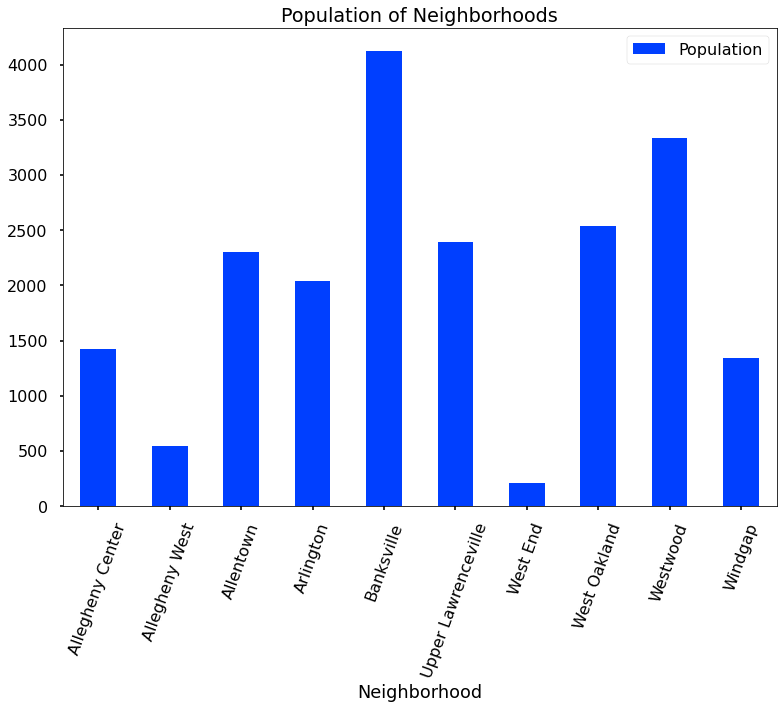

In [23]:
import pandas as pd
import matplotlib.pyplot as plot
data = {"Neighborhood": ["Allegheny Center", "Allegheny West", "Allentown", "Arlington", "Banksville" , 'Upper Lawrenceville', 'West End', 'West Oakland', 'Westwood', 'Windgap'],
        "Population": [1419, 540, 2305, 2040, 4127, 2394, 205, 2534, 3332, 1344]
        };

dataFrame = pd.DataFrame(data=data);
dataFrame.plot.bar(x="Neighborhood", y="Population", rot=70, title="Population of Neighborhoods");
plot.show(block=True);

# Conclusion
The Best neighborhood in case of a zombie apocalpyse goes to the West End Neighborhood. Our metric as a group was finding the best neighborhood where one can hide from the apocalypse. The lower the population the better it is for the population to find hideouts and vacant places to avoid the zombies. 

# Final Conclusion

Based on the data collected from the WPRDC, it was determined that the Bridges and Parks in the City of Pittsburgh datasets were most useful in concluding the best neighborhood in case of a Zombie Apocalypse. For the Bridges in the City of Pittsburgh dataset, there were two neighborhoods with an extremely high number of bridge connections. Squirrel Hill South had a total of 14 bridge connections and Central Business District had a total of 12. However, the remaining neighborhoods did not exceed a total of 7 bridge connections so the dataset was truncated to only represent the neighborhoods with the highest number of bridge connections. With that information, the Parks in the City of Pittsburgh dataset was explored and it was discovered that East Liberty had a total of 12 parks and Central Business District had a total of 10. The remaining neighborhoods did not exceed a total of 8 parks, and therefore the dataset was truncated as well for better comparisons. Combining the information from both datasets, it was clear that the best neighborhood would be **Central Business district** as it had the highest combination of bridge connections and number of parks.

**Kaitlyn**: From the combined data collected from WPRDC, it was determined that Central Business District is the best neighborhood in the case of a Zombie Apocalypse. With having both the second most amount of bridge connections and the number of parks, Central Business District would be the most secure and have the most places to hide. This differs from my personal favorite neighborhood of Squirrel Hill South which ended up having the most amount of bridge connections, along with a total of 6 parks. Ultimately, Squirrel Hill South would also be a good choice in the case of a zombie apocalypse, however, it wouldn’t be the best.

**Maia**: Our result for the best neighborhood was the Central Business District. Having not been from Pittsburgh, I did not know what to expect for the best neighborhood. WIth my dataset, the Central Business District was the second highest with having the most parks. I do wish my dataset had a bit more data to compare and contribute to the best neighborhood in case of a zombie apocalypse.

**Jay**: I found out that my data set concluded by finding that the west end was the perfect neighborhood for a zombie apocalypse. The population was the lowest in all of my data findings. And In this case, it is the best place to hide and avoid zombies. In contrast, My group’s neighborhood resulted with the Central Business District. Given the accomidities of the chosen neighborhood, Central Business District is the best option. 